In [131]:
import pandas as pd
import string
pd.set_option('display.max_columns', None)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
dr=pd.read_csv('/content/war.csv')
dr

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,Rob Logan,Remember ONE thing Canada !\n\nNot ONE Politic...,Fri Jan 31 13:17:11 +0000 2025,1518,4896
1,2,The War on Beauty,Bring back saying grace in public https://t.co...,Thu Jan 30 17:23:36 +0000 2025,2600,46920
2,3,Leading Report,"BREAKING: Tulsi Gabbard on how ‘faulty, inadeq...",Thu Jan 30 16:01:47 +0000 2025,989,6177
3,4,Clandestine,Here’s my summary of the RFK Jr. confirmation ...,Wed Jan 29 17:48:40 +0000 2025,3838,19096
4,5,Bannon’s WarRoom,Nicole Shanahan: MAHA Is The Biggest Movement ...,Thu Jan 30 22:54:57 +0000 2025,121,482
...,...,...,...,...,...,...
1351,1352,Myra Brady,Huge CELEB BACKING CAUSE ON TOP BIBLICAL AJ ST...,Tue Jan 28 02:17:19 +0000 2025,0,0
1352,1353,AMERICA1,Yes u did not understand it was never about it...,Tue Jan 28 02:13:36 +0000 2025,0,0
1353,1354,Nicolas Alexander,#Peace advocates want military dollars redirec...,Tue Jan 28 02:11:47 +0000 2025,0,1
1354,1355,Mohd Saifullah Majid,The Chronicles of this Trade War will be stuff...,Tue Jan 28 02:16:34 +0000 2025,0,0


In [133]:
print(dr.info())
print(dr.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  1356 non-null   int64 
 1   Username     1356 non-null   object
 2   Text         1356 non-null   object
 3   Created At   1356 non-null   object
 4   Retweets     1356 non-null   int64 
 5   Likes        1356 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 63.7+ KB
None
Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64


In [134]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

In [135]:
profile=ProfileReport(dr,title='wAR')
profile.to_file(output_file='war.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [136]:
profile.to_notebook_iframe()


### Update Datatype

In [137]:
# update datatypes
dr['Created At'] = pd.to_datetime(dr['Created At'])
dr.dtypes

,0
Tweet_count,int64
Username,object
Text,object
Created At,"datetime64[ns, UTC]"
Retweets,int64
Likes,int64


### remove urls

In [138]:
import re
#remove urls
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

dr['Text'] = dr['Text'].apply(remove_url)

#### remove **usernames**

In [139]:
#This function removes username
def remove_at(text):
    return re.sub(r'@\w+', '', text)

dr['Text'] = dr['Text'].apply(remove_at)

#### remove_html

In [140]:
#This function removes html tags
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

dr['Text'] = dr['Text'].apply(remove_html)

### remove_emoji

In [141]:
# Install the emoji library
!pip install emoji

import emoji
# This function removes emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

dr['Text'] = dr['Text'].apply(remove_emoji)
dr['Username'] = dr['Username'].apply(remove_emoji)

#### remove punctuations

In [142]:
#This function removes punctuations
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))

dr['Text'] = dr['Text'].apply(remove_punct)
dr['Username'] = dr['Username'].apply(remove_punct)

### Remove Stopwords

In [143]:
# Download necessary NLTK data
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

dr['Text'] = dr['Text'].apply(remove_stopwords)

### Handle Outliers

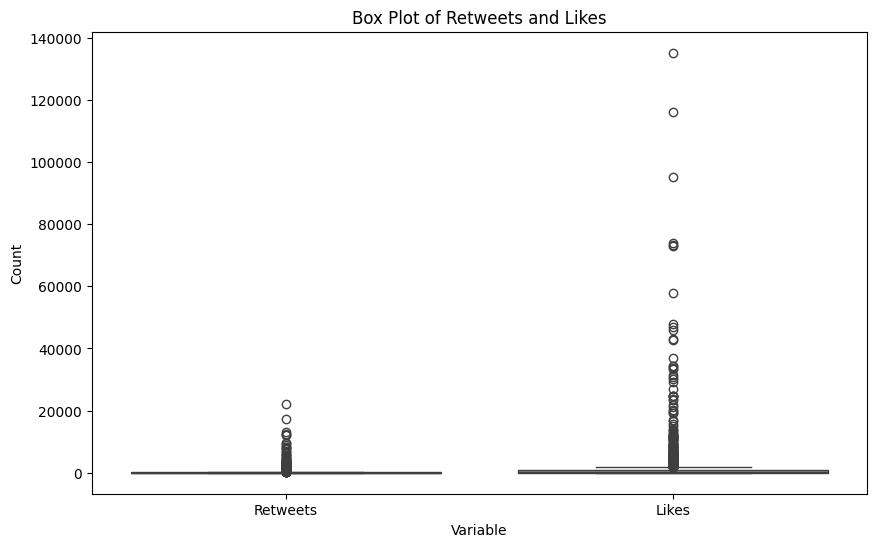

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dr[['Retweets', 'Likes']])
plt.title('Box Plot of Retweets and Likes')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.show()

In [147]:
# Handle Outliers basic capping
Q1_retweets = dr['Retweets'].quantile(0.25)
Q3_retweets = dr['Retweets'].quantile(0.75)
IQR_retweets = Q3_retweets - Q1_retweets
upper_bound_retweets = Q3_retweets + 1.5 * IQR_retweets

dr['Retweets'] = dr['Retweets'].clip(upper=upper_bound_retweets)  # Cap values

Q1_likes = dr['Likes'].quantile(0.25)
Q3_likes = dr['Likes'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes

dr['Likes'] = dr['Likes'].clip(upper=upper_bound_likes)  # Cap values

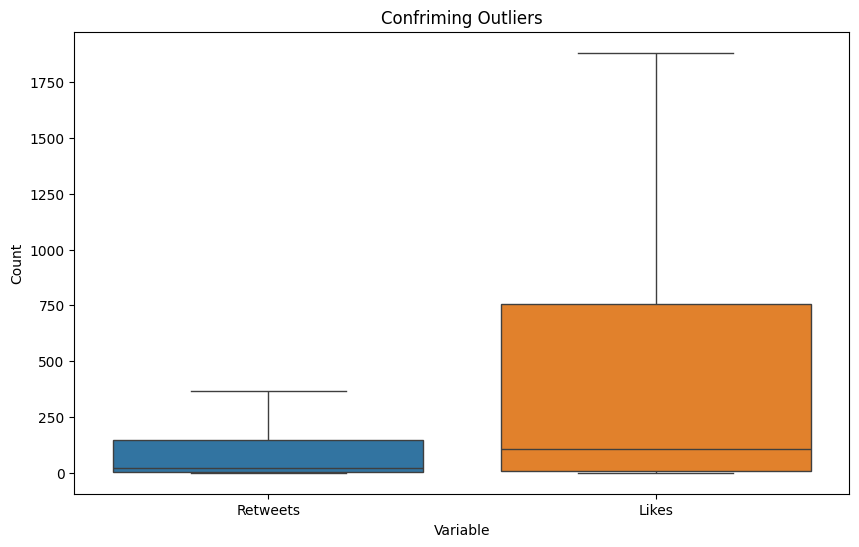

In [150]:
#confirm outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dr[['Retweets', 'Likes']])
plt.title('Confriming Outliers')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.show()

### Ensuring data  consistency

In [149]:
#convert to lower
dr["Text"]=dr["Text"].str.lower()
dr["Username"]=dr["Username"].str.lower()